# Creating the bayts probability time series and doing bayesian updating to refine the non forest probabilities for each pixel/date

In [1]:
from pybayts.bayts import merge_cpnf_tseries, deseason_ts, create_bayts_ts, calc_cpnf, bayts_update, bayts_to_date_array
from pybayts.data.io import read_and_stack_tifs
from pybayts import plot as pp
import numpy as np
from pandas import read_csv
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import matplotlib as mpl

# rdf = read_csv("../tests/baytsdata/detect_bayts.csv")
folder_vv = "../tests/baytsdata/s1vv_tseries/"
folder_ndvi = "../tests/baytsdata/lndvi_tseries/"
pdf_type_l = ("gaussian", "gaussian")
pdf_forest_l = (0, 0.1)  # mean and sd
pdf_nonforest_l = (-0.5, 0.125)  # mean and sd
bwf_l = (.1, .9)
pdf_type_s = ("gaussian", "gaussian")
pdf_forest_s = (-1, 0.75)  # mean and sd

pdf_nonforest_s = (-4, 1)  # mean and sd
bwf_s = (.1, .9)

s1vv_ts = read_and_stack_tifs(folder_vv, ds="vv")
s1vv_ts.name = "s1vv"

lndvi_ts = read_and_stack_tifs(folder_ndvi, ds="lndvi")
lndvi_ts.name = "lndvi"

_ = deseason_ts(s1vv_ts)
_ = deseason_ts(lndvi_ts)

cpnf_ts = merge_cpnf_tseries(
    s1vv_ts,
    lndvi_ts,
    pdf_type_l,
    pdf_type_s,
    pdf_forest_l,
    pdf_nonforest_l,
    pdf_forest_s,
    pdf_nonforest_s,
    bwf_l,
    bwf_s,
)

bayts = create_bayts_ts(cpnf_ts)

ibayts = bayts_update(bayts, chi = 0.5, cpnf_min = 0.5)

date_index_arr, actual_dates, decimal_yr_arr = bayts_to_date_array(ibayts)

/Users/lillythomas/.pyenv/versions/pybayts37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
/Users/lillythomas/.pyenv/versions/pybayts37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1390: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)


In [2]:
import rioxarray as rio
r_arr_result = rio.open_rasterio("../tests/baytsdata/bayts_spatial_result.tif", masked=True)

In [3]:
r_arr_result.sel(band=5)[0,52]

<xarray.DataArray ()>
array(0.987805)
Coordinates:
    band         int64 5
    y            float64 8.003e+06
    x            float64 5.961e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  2016.3945205479
    STATISTICS_MEAN:     2016.3766069547
    STATISTICS_MINIMUM:  2016.3369863014
    STATISTICS_STDDEV:   0.015762966521168
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

output x,y,date build a raster from that

In [4]:
import rioxarray as rx

masked_bayts_r = rx.open_rasterio("../tests/baytsdata/bayts_spatial_result.tif", masked=True)

In [5]:
import xarray as xr
r_results_ds = masked_bayts_r.to_dataset(dim="band")

In [6]:
r_results_ds.dims

Frozen(SortedKeysDict({'y': 100, 'x': 100}))

In [7]:
r_results_ds['py_decimal_years'] = (("y","x"), decimal_yr_arr)

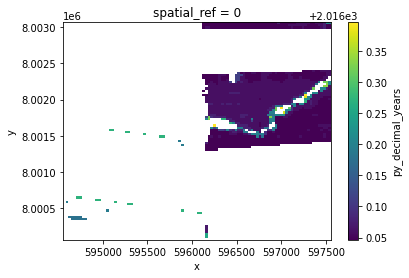

In [8]:
r_results_ds['py_decimal_years'].plot.imshow()

In [9]:
r_results_ds['py_decimal_years']

<xarray.DataArray 'py_decimal_years' (y: 100, x: 100)>
array([[          nan,           nan,           nan, ..., 2016.07650273,
        2016.20753643, 2016.19933971],
       [          nan,           nan,           nan, ..., 2016.07650273,
        2016.04644809, 2016.04644809],
       [          nan,           nan,           nan, ..., 2016.07650273,
        2016.04644809, 2016.04644809],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])
Coordinates:
  * y            (y) float64 8.003e+06 8.003e+06 8.003e+06 ... 8e+06 8e+06 8e+06
  * x            (x) float64 5.946e+05 5.946e+05 ... 5.975e+05 5.975e+05
    spatial_ref  int64 0

In [10]:
masked_bayts_r.sel(band=3)

<xarray.DataArray (y: 100, x: 100)>
array([[        nan,         nan,         nan, ...,         nan, 2016.205444,
        2016.205444],
       [        nan,         nan,         nan, ..., 2016.010986, 2016.010986,
        2016.010986],
       [        nan,         nan,         nan, ..., 2016.010986, 2016.010986,
        2016.010986],
       ...,
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan],
       [        nan,         nan,         nan, ...,         nan,         nan,
                nan]])
Coordinates:
    band         int64 3
  * y            (y) float64 8.003e+06 8.003e+06 8.003e+06 ... 8e+06 8e+06 8e+06
  * x            (x) float64 5.946e+05 5.946e+05 ... 5.975e+05 5.975e+05
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  2016.3945205479
    STATISTICS_MEAN:     2016.3766069547
    STATISTICS_MINIMUM:  2016.3369863014
    STATISTICS_STDDEV:   0.015762966521168
    scale_factor:        1.0
    add_offset:          0.0
    grid_mapping:        spatial_ref

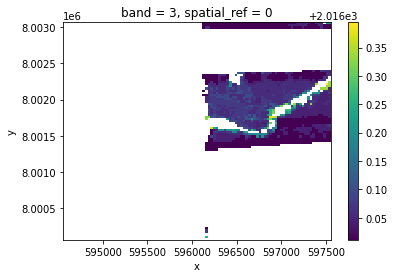

In [11]:
masked_bayts_r.sel(band=3).plot.imshow()

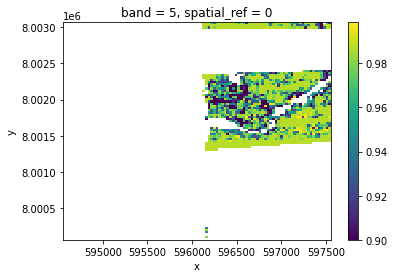

In [12]:
masked_bayts_r.sel(band=5).plot.imshow()

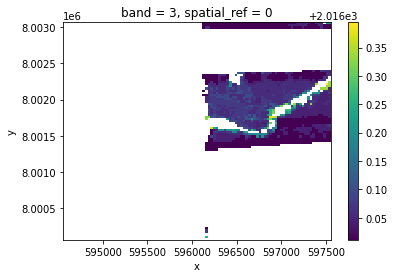

In [13]:
masked_bayts_r.sel(band=3).plot.imshow()

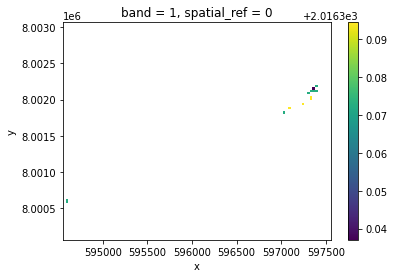

In [14]:
masked_bayts_r.sel(band=1).plot.imshow()

In [ ]:
import xarray as xr
import numpy as np
xr.where(bayts['flagged_change'], bayts['updated_bayts'], np.nan)

In [ ]:
bayts['updated_bayts'][100,:,:].plot.imshow()

In [ ]:
pp.plot_da_pixel_ts(s1vv_ts[:,50,20], "s1vv")

In [ ]:
pp.plot_da_pixel_ts(lndvi_ts[:,50,20],"lndvi")

In [ ]:
pp.plot_da_pixel_ts(bayts_ts[:,50,20], "bayts")

In [ ]:
# single_pixel = s1vv_ts.isel(x=40, y=60)

# single_pixel.plot()

### Evaluation

In [15]:
gfw = rx.open_rasterio("../tests/baytsdata/Hansen_GFC_2019_v17_lossyear_10S_070W_bayts_clip.tif")

In [16]:
gfw.shape

(1, 108, 113)

In [17]:
terrabrasilia_class_year_dict = {0:2008, 1:2009, 2:2010, 3:2011, 4:2012, 5:2013, 6:2014, 7:2015, 8:2016, 9:2017, 10:2018, 11:2019}

In [18]:
gfw_class_year_dict = {0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 9:2009, 10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017, 18:2018, 19:2019}

In [19]:
def generate_cm(flat_groundtruth, flat_decimal_yr_arr, year):
    """Compute confusion matrix using co-registered reference and bayts inference data.
    Args:
        flat_groundtruth (array): flattened array of boolean values where [True = change, False = no change]
        for a given year
        
        flat_decimal_yr_arr (array): flattened array of boolean values where [True = change, False = no change]
        for a given year
        
        year (integer): the year associated with the flat_groundtruth and flat_decimal_yr_arr arrays.
        
    Returns:
        A confusion matrix for a single year.
    """
    
    labels = [False,  True]
    cm = confusion_matrix(flat_groundtruth, flat_decimal_yr_arr, labels=labels)
    print(f"Confusion matrix for {year}:", cm)
    return cm

In [20]:
def generate_f1(flat_groundtruth, flat_decimal_yr_arr, year):
    """Compute F1 score using co-registered reference and bayts inference data.
    Args:
        flat_groundtruth (array): flattened array of boolean values where [True = change, False = no change]
        for a given year
        
        flat_decimal_yr_arr (array): flattened array of boolean values where [True = change, False = no change]
        for a given year
        
        year (integer): the year associated with the flat_groundtruth and flat_decimal_yr_arr arrays.
        
    Returns:
        The F1 score for a single year.
    """
    
    f1 = f1_score(flat_groundtruth, flat_decimal_yr_arr, average='macro')
    print(f"F1 score for {year}:", f1)
    return f1

In [21]:
def evaluate(groundtruth, decimal_yr_arr, aoi_name):
    """Evaluate co-registered reference and bayts inference data using confusion matrix and F1 score.
    Args:
        groundtruth (str): rioxarray of clipped reference image (may need to run reproject match against a sample time series mosaic for the AOI)
        
        decimal_yr_arr (array): array of boolean values where [True = change, False = no change]
        
        aio_name (str): the area of interest to evaluate, which can be one of ['Brazil', 'DRC', 'Indonesia']. 
        
    Returns:
        Printed confusion matrices and F1 scores for each year in the study period.
    """
    
    decimal_yr_arr_years = np.unique(decimal_yr_arr.astype(np.uint16))
    
    if aoi_name == 'Brazil':
        # terrabrasilia ground truth years
        class_year_dict = {0:2008, 1:2009, 2:2010, 3:2011, 4:2012, 5:2013, 6:2014, 7:2015, 8:2016, 9:2017, 10:2018, 11:2019}

        
        year_gt_list = []
        year_pr_list = []
        
        for cl in class_year_dict:          
            year_gt = class_year_dict[cl]
            year_gt_list.append(year_gt)
            
        for yr in decimal_yr_arr_years.tolist():
            year_pr_list.append(yr)
        
        match_years = set(year_gt_list) & set(year_pr_list)
        
        print("year_gt_list, year_pr_list: ", year_gt_list, year_pr_list)
        print("match_years: ", match_years)
        
        for year in match_years:
            groundtruth_arr = groundtruth.copy()
            groundtruth_arr = groundtruth_arr  > cl
        
            groundtruth_flat = groundtruth_arr.values.flatten()
            decimal_yr_arr_flat = decimal_yr_arr.astype(np.uint16).flatten()
            
            cm = generate_cm(groundtruth_flat, decimal_yr_arr_flat, year)
            f1 = generate_f1(groundtruth_flat, decimal_yr_arr_flat, year)
            
            classes = [False,  True]

            %matplotlib inline
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            fig, ax = plt.subplots(figsize=(10, 10))
            im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            ax.figure.colorbar(im, ax=ax)
            # We want to show all ticks...
            ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   # ... and label them with the respective list entries
                   xticklabels=['change', 'no change'], yticklabels=['change', 'no change'],
                   title=f'Normalized Confusion Matrix for {aoi_name} in {year}',
                   ylabel='True label',
                   xlabel='Predicted label')

            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")

            # Loop over data dimensions and create text annotations.
            fmt = '.2f' #'d' # if normalize else 'd'
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),
                            ha="center", va="center",
                            color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
            ax.set_ylim(len(classes)-0.5, -0.5)
            
            fig.savefig(f'../tests/baytsdata/cm_{aoi_name}_{year}.png')
    else:
        # aoi is either DRC or Indonesia
        # Global Forest Watch ground truth years
        class_year_dict = {0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005, 6:2006, 7:2007, 8:2008, 9:2009, 10:2010, 11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 17:2017, 18:2018, 19:2019}

        
        year_gt_list = []
        year_pr_list = []
        
        for cl in class_year_dict:          
            year_gt = class_year_dict[cl]
            year_gt_list.append(year_gt)
            
        for yr in decimal_yr_arr_years.tolist():
            year_pr_list.append(yr)
        
        match_years = set(year_gt_list) & set(year_pr_list)
        print("match_years: ", match_years)
        
        for year in match_years:
            groundtruth_arr = groundtruth.copy()
            groundtruth_arr = groundtruth_arr  > cl
        
            groundtruth_flat = groundtruth_arr.values.flatten()
            decimal_yr_arr_flat = decimal_yr_arr.astype(np.uint16).flatten()
            decimal_yr_arr_flat = decimal_yr_arr_flat.astype(bool)
            
            print("unique values in groundtruth_flat, decimal_yr_arr_flat: ", np.unique(groundtruth_flat), np.unique(decimal_yr_arr_flat))
            
            cm = generate_cm(groundtruth_flat, decimal_yr_arr_flat, year)
            f1 = generate_f1(groundtruth_flat, decimal_yr_arr_flat, year)
            
            classes = [False,  True]
            %matplotlib inline
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            fig, ax = plt.subplots(figsize=(10, 10))
            im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
            ax.figure.colorbar(im, ax=ax)
            # We want to show all ticks...
            ax.set(xticks=np.arange(cm.shape[1]),
                   yticks=np.arange(cm.shape[0]),
                   # ... and label them with the respective list entries
                   xticklabels=['change', 'no change'], yticklabels=['change', 'no change'],
                   title=f'Normalized Confusion Matrix for {aoi_name} in {year}',
                   ylabel='True label',
                   xlabel='Predicted label')

            # Rotate the tick labels and set their alignment.
            plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                     rotation_mode="anchor")

            # Loop over data dimensions and create text annotations.
            fmt = '.2f' #'d' # if normalize else 'd'
            thresh = cm.max() / 2.
            for i in range(cm.shape[0]):
                for j in range(cm.shape[1]):
                    ax.text(j, i, format(cm[i, j], fmt),
                            ha="center", va="center",
                            color="white" if cm[i, j] > thresh else "black")
            fig.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
            ax.set_ylim(len(classes)-0.5, -0.5)
            
            fig.savefig(f'../tests/baytsdata/cm_{aoi_name}_{year}.png')

In [22]:
groundtruth_arr= rx.open_rasterio(gfw)
groundtruth_arr_repr_match = groundtruth_arr.rio.reproject_match(r_arr_result)
groundtruth_arr_repr_match = groundtruth_arr_repr_match.squeeze()

In [23]:
groundtruth_arr_repr_match.shape, decimal_yr_arr.shape

((100, 100), (100, 100))

match_years:  {2016}
unique values in groundtruth_flat, decimal_yr_arr_flat:  [False  True] [False  True]
Confusion matrix for 2016: [[8303 1620]
 [  34   43]]
F1 score for 2016: 0.4794223917614029


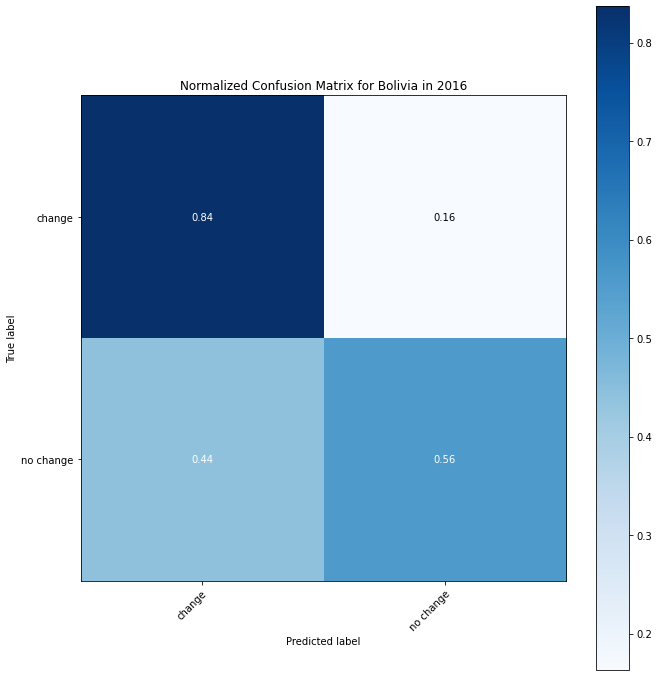

In [24]:
# this will take some time to run on all of the matching years 
evaluate(groundtruth_arr_repr_match, decimal_yr_arr, "Bolivia")